# Predictive Customer Churn

<img src="IMG_8811.png" alt="Description" width="300" height="200">

About Dataset
Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition. By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.


Kaggle Challenge [Link](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)

# Solution

In [8]:
# Import main libraries and functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.display import display, HTML

# Dataset
import kagglehub

# Machine Learning
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Define the target path where the dataset will be downloaded
target_folder = "./data"

# Ensure the directory exists
os.makedirs(target_folder, exist_ok=True)

# Use Kaggle API to download the dataset
!kaggle datasets download -d muhammadshahidazeem/customer-churn-dataset -p {target_folder} --unzip

Dataset URL: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
License(s): GPL-2.0
customer-churn-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## Data Extraction

In [10]:
path = "data"

training_dataset_path = os.path.join(path, "customer_churn_dataset-training-master.csv")
testing_dataset_path = os.path.join(path, "customer_churn_dataset-testing-master.csv")

train_dataset_df = pd.read_csv(training_dataset_path)
test_dataset_df = pd.read_csv(testing_dataset_path)

In [11]:
train_dataset_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [12]:
test_dataset_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [13]:
print("Number of lines with any null values in training set: ", train_dataset_df.isna().any(axis=1).sum())
print("Number of lines with any null values in test set: ", test_dataset_df.isna().any(axis=1).sum())

Number of lines with any null values in training set:  1
Number of lines with any null values in test set:  0


In [14]:
train_dataset_df = train_dataset_df.drop(columns=["CustomerID"])
test_dataset_df = test_dataset_df.drop(columns=["CustomerID"])

train_dataset_df = train_dataset_df.dropna()

In [15]:
train_dataset_df = train_dataset_df.convert_dtypes(infer_objects=False)
test_dataset_df = test_dataset_df.convert_dtypes(infer_objects=False)

In [16]:
print("Train dataset dtypes")
print(train_dataset_df.dtypes)

print("\nTest dataset dtypes")
print(test_dataset_df.dtypes)

Train dataset dtypes
Age                           Int64
Gender               string[python]
Tenure                        Int64
Usage Frequency               Int64
Support Calls                 Int64
Payment Delay                 Int64
Subscription Type    string[python]
Contract Length      string[python]
Total Spend                 Float64
Last Interaction              Int64
Churn                         Int64
dtype: object

Test dataset dtypes
Age                           Int64
Gender               string[python]
Tenure                        Int64
Usage Frequency               Int64
Support Calls                 Int64
Payment Delay                 Int64
Subscription Type    string[python]
Contract Length      string[python]
Total Spend                   Int64
Last Interaction              Int64
Churn                         Int64
dtype: object


In [17]:
test_dataset_df = test_dataset_df.astype(train_dataset_df.dtypes.to_dict())

## EDA

### Basic statistics

In [18]:
print("Train: ")
train_dataset_df.info()

print("\nTest: ")
test_dataset_df.info()

Train: 
<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  Int64  
 1   Gender             440832 non-null  string 
 2   Tenure             440832 non-null  Int64  
 3   Usage Frequency    440832 non-null  Int64  
 4   Support Calls      440832 non-null  Int64  
 5   Payment Delay      440832 non-null  Int64  
 6   Subscription Type  440832 non-null  string 
 7   Contract Length    440832 non-null  string 
 8   Total Spend        440832 non-null  Float64
 9   Last Interaction   440832 non-null  Int64  
 10  Churn              440832 non-null  Int64  
dtypes: Float64(1), Int64(7), string(3)
memory usage: 43.7 MB

Test: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------           

In [19]:
print("Number of lines with any null values in training set: ", train_dataset_df.isna().any(axis=1).sum())
print("Number of lines with any null values in test set: ", test_dataset_df.isna().any(axis=1).sum())

Number of lines with any null values in training set:  0
Number of lines with any null values in test set:  0


In [20]:
train_describe = train_dataset_df.describe()
test_describe = test_dataset_df.describe()

# Convert DataFrames to HTML and display side by side
html_content = f"""
<div style="display: flex; gap: 50px;">
    <div>{train_describe.to_html()}</div>
    <div>{test_describe.to_html()}</div>
</div>
"""

display(HTML(html_content))

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.0,440832.0,440832.0,440832.0,440832.0,440832.0,440832.0,440832.0
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.0,1.0,1.0,0.0,0.0,100.0,1.0,0.0
25%,29.0,16.0,9.0,1.0,6.0,480.0,7.0,0.0
50%,39.0,32.0,16.0,3.0,12.0,661.0,14.0,1.0
75%,48.0,46.0,23.0,6.0,19.0,830.0,22.0,1.0
max,65.0,60.0,30.0,10.0,30.0,1000.0,30.0,1.0
,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.0,64374.0,64374.0,64374.0,64374.0,64374.0,64374.0,64374.0


In [21]:
# Training dataset and test dataset sizes

test_percentage = 100 * len(test_dataset_df) / (len(test_dataset_df) + len(train_dataset_df))
print(f"Percentage of data for test: {test_percentage:.2f} %")

Percentage of data for test: 12.74 %


### Dataset composition by target

In [22]:
churn_rate_train = train_dataset_df["Churn"].value_counts() / len(train_dataset_df["Churn"])
churn_rate_train

Churn
1    0.567107
0    0.432893
Name: count, dtype: Float64

In [23]:
churn_rate_test = test_dataset_df['Churn'].value_counts() / len(test_dataset_df['Churn'])
churn_rate_test

Churn
0    0.526315
1    0.473685
Name: count, dtype: Float64

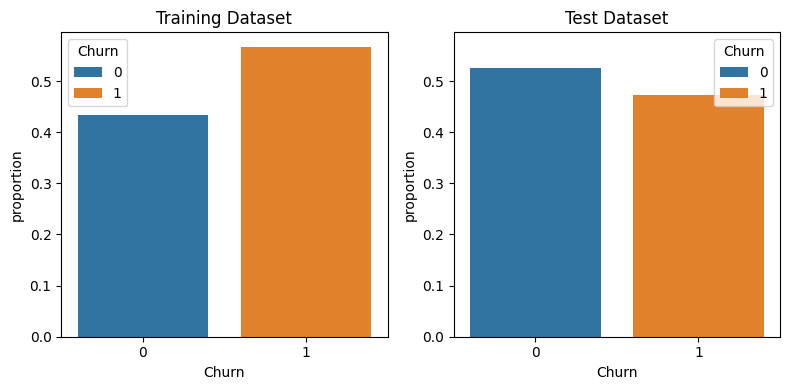

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

ax = sns.countplot(data=train_dataset_df, x="Churn", hue="Churn", ax=axes[0], stat="proportion")
ax.set_title("Training Dataset")

ax = sns.countplot(data=test_dataset_df, x="Churn", hue="Churn", ax=axes[1], stat="proportion")
ax.set_title("Test Dataset")

# Determine the common y-axis range
y_min = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0])
y_max = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])

# Set the same y-axis limits for both subplots
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

### Categorical and numerical features

In [25]:
# Identification of Categorical and Numerical Features
features_df = train_dataset_df.drop(columns=["Churn"])
target = train_dataset_df["Churn"]

feature_types_s = features_df.dtypes
cat_feat_names = list(feature_types_s[feature_types_s == "string"].index.values)
num_feat_names = list(feature_types_s[feature_types_s.astype(str).isin(["Int64", "Float64"])].index.values)
print("Categorical Feat: ", cat_feat_names)
print("Numerical Feat:" , num_feat_names)

Categorical Feat:  ['Gender', 'Subscription Type', 'Contract Length']
Numerical Feat: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']


#### Categorical Features

In [26]:
features_df["Subscription Type"].value_counts(normalize=True)

Subscription Type
Standard    0.338288
Premium     0.337267
Basic       0.324446
Name: proportion, dtype: Float64

In [27]:
features_df["Contract Length"].value_counts(normalize=True)

Contract Length
Annual       0.401963
Quarterly    0.400447
Monthly       0.19759
Name: proportion, dtype: Float64

In [28]:
features_df["Gender"].value_counts(normalize=True)

Gender
Male      0.567681
Female    0.432319
Name: proportion, dtype: Float64

Observations: Gender is a nominal feature, whereas 'Contract Length' and 'Subscription Type' are ordinal features

### Main Plots (Training Dataset)

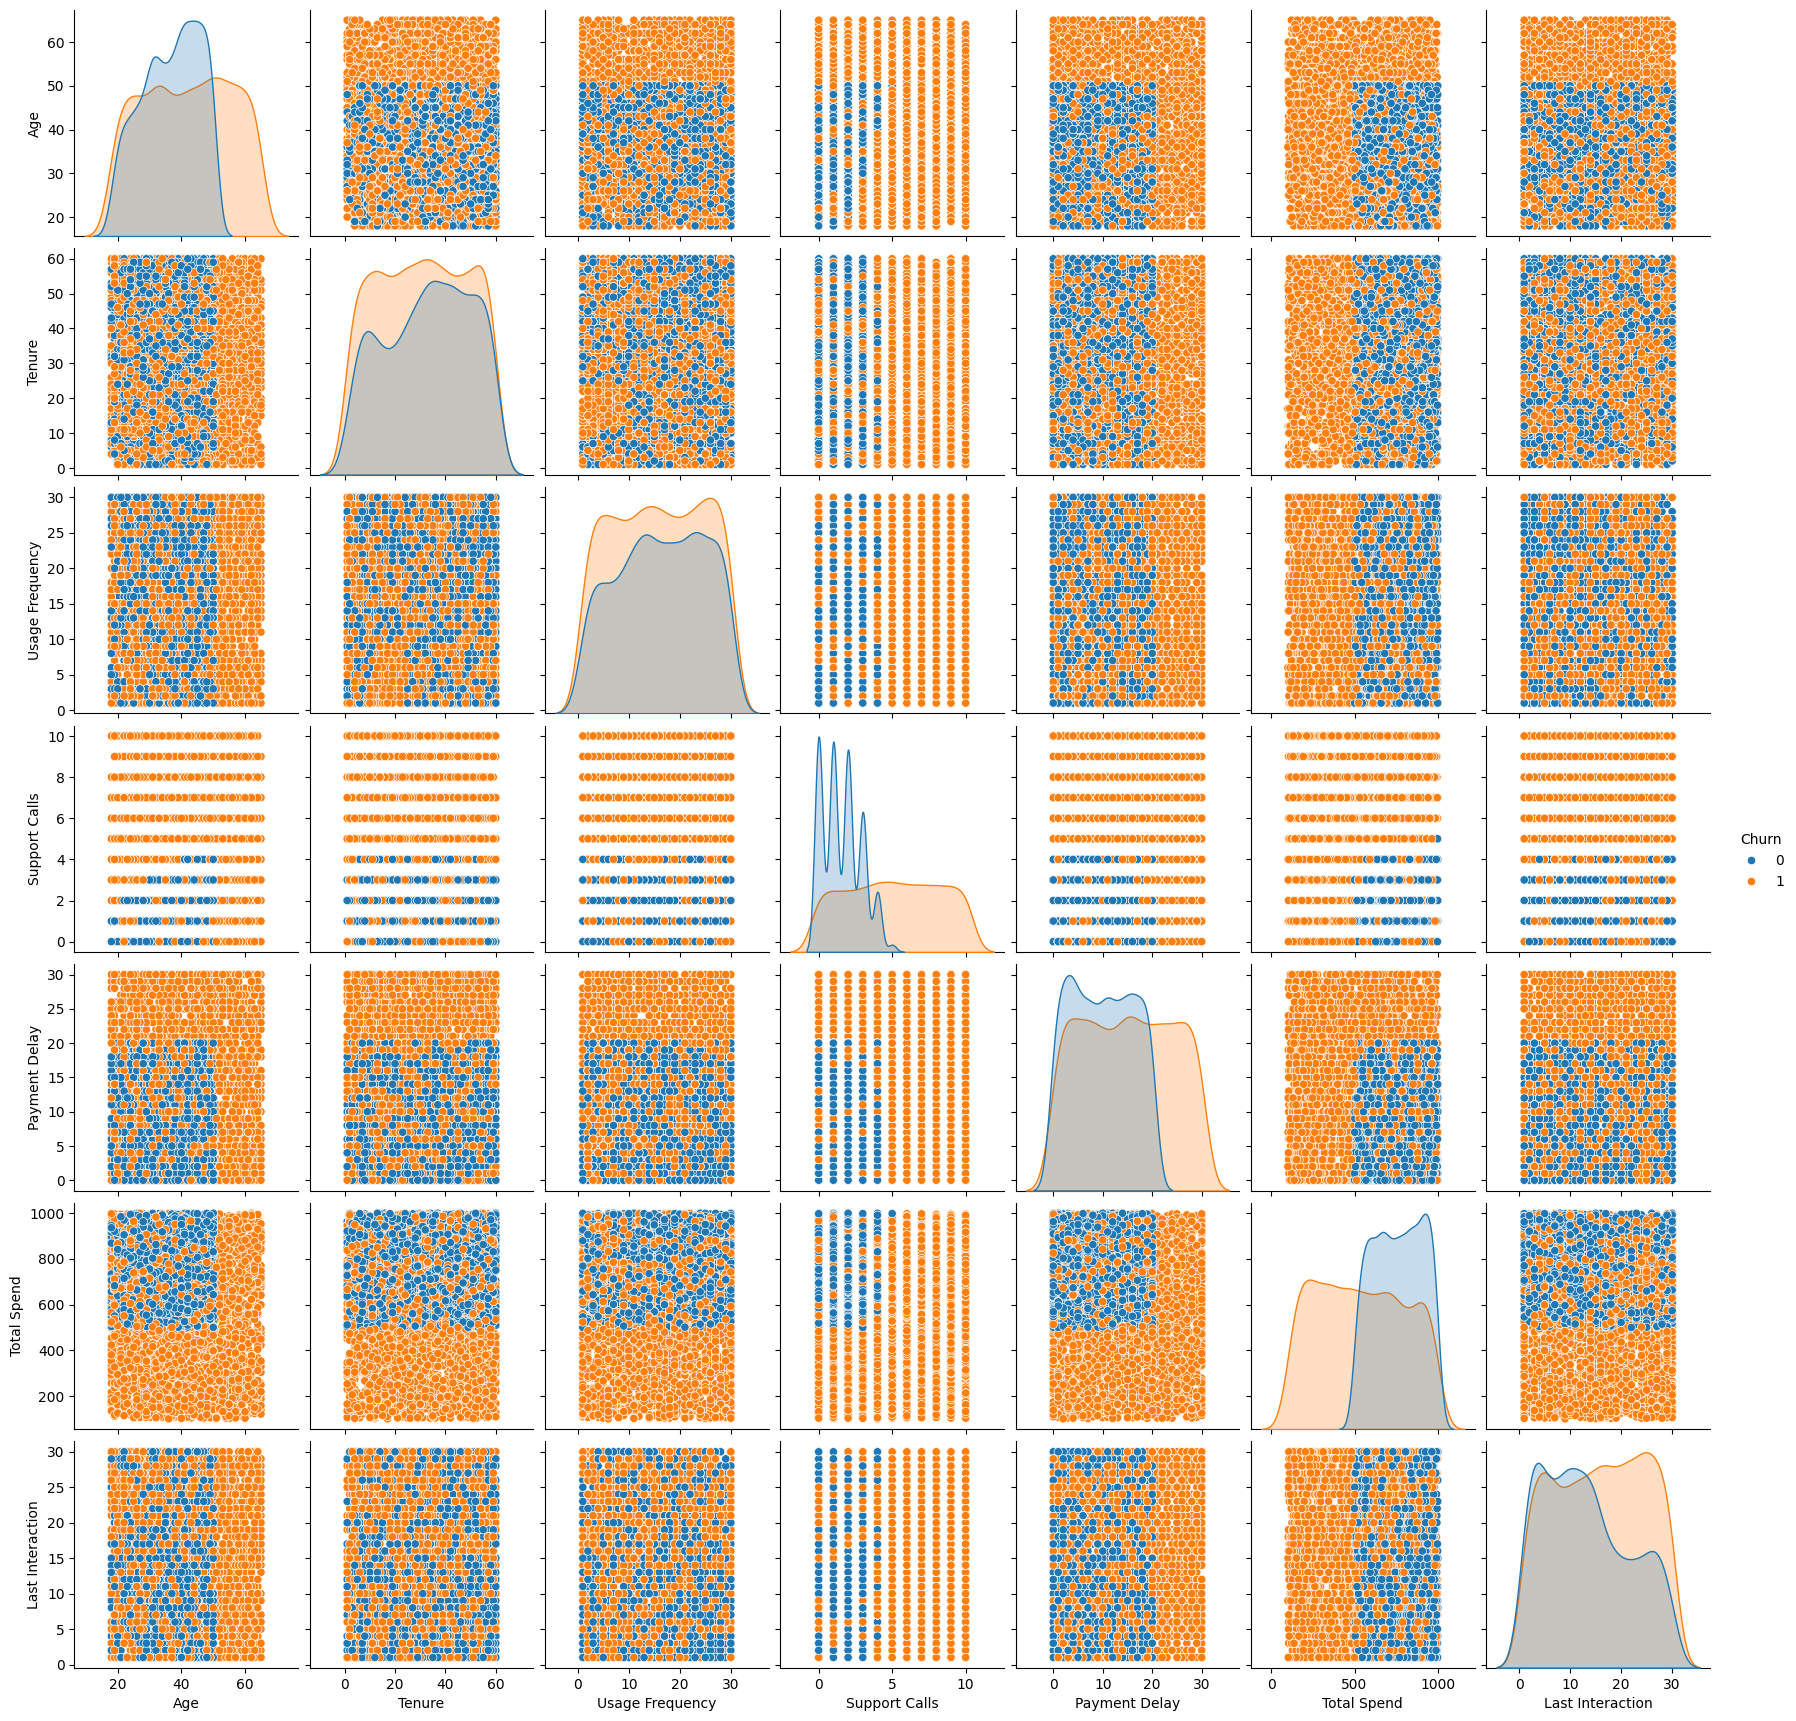

In [29]:
# Subsample the data (e.g., 5,000 rows)
sampled_train_data = train_dataset_df.sample(n=5000, random_state=42)

sns.pairplot(data=sampled_train_data, hue="Churn")

<Axes: >

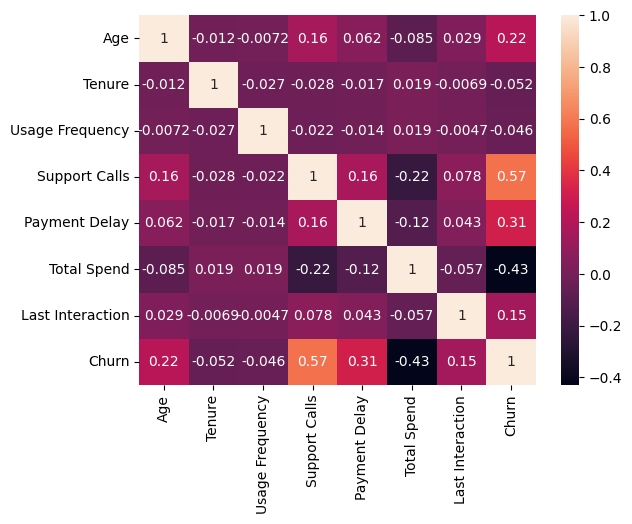

In [30]:
sns.heatmap(data=train_dataset_df[num_feat_names + ["Churn"]].corr("pearson"), annot=True)

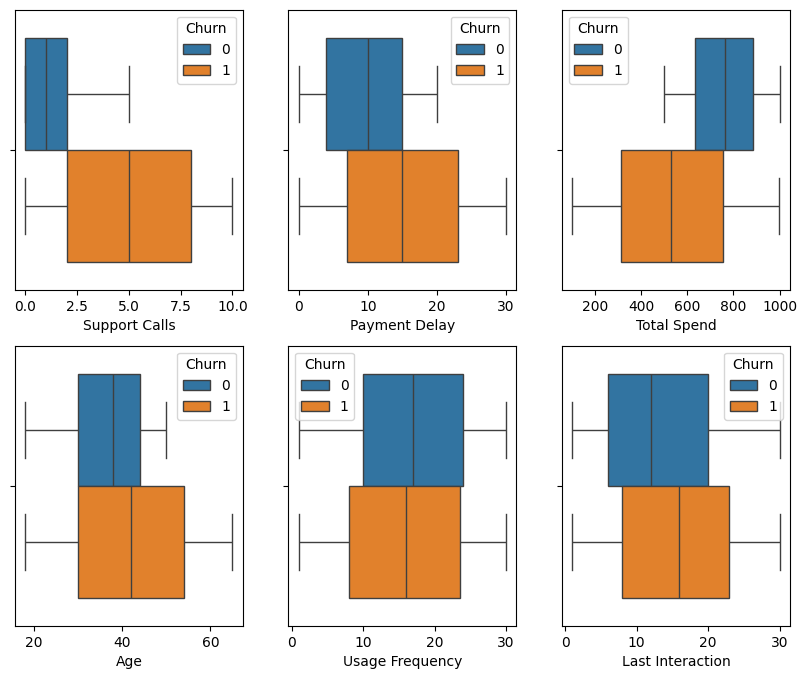

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=3)

fig.set_size_inches(10, 8)

features_to_plot = [["Support Calls", "Payment Delay", "Total Spend"], ["Age", "Usage Frequency", "Last Interaction"]]

for row in range(2):
    for col in range(3):
        sns.boxplot(data=sampled_train_data, x=features_to_plot[row][col], ax=ax[row][col], flierprops={"marker": "o", "color": "red", "markersize": 8}, hue="Churn")

## Pre-Processing

In [32]:
# Separate features from target variable

# Training dataset
X_train = train_dataset_df.drop(columns=["Churn"])
y_train = train_dataset_df["Churn"]

# Test dataset
X_test = test_dataset_df.drop(columns=["Churn"])
y_test = test_dataset_df["Churn"]

In [33]:
# Enconding for Categorical Features

ordered_categories_subs_type = ["Basic", "Standard", "Premium"]
ordered_categories_contract_len= ["Monthly", "Quarterly", "Annual"]

# Training dataset
X_train_encoded = pd.get_dummies(X_train, columns=["Gender"], drop_first=True)
X_train_encoded["Subscription Type"] = pd.Categorical(X_train_encoded["Subscription Type"], categories=ordered_categories_subs_type, ordered=True)
X_train_encoded["Contract Length"] = pd.Categorical(X_train_encoded["Contract Length"], categories=ordered_categories_contract_len, ordered=True)

# Test dataset
X_test_encoded = pd.get_dummies(X_test, columns=["Gender"], drop_first=True)
X_test_encoded["Subscription Type"] = pd.Categorical(X_test_encoded["Subscription Type"], categories=ordered_categories_subs_type, ordered=True)
X_test_encoded["Contract Length"] = pd.Categorical(X_test_encoded["Contract Length"], categories=ordered_categories_contract_len, ordered=True)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the ordered categorical feature
X_train_encoded['Subscription Type'] = label_encoder.fit_transform(X_train_encoded['Subscription Type'])
X_train_encoded['Contract Length'] = label_encoder.fit_transform(X_train_encoded['Contract Length'])

# Apply label encoding to the ordered categorical feature
X_test_encoded['Subscription Type'] = label_encoder.fit_transform(X_test_encoded['Subscription Type'])
X_test_encoded['Contract Length'] = label_encoder.fit_transform(X_test_encoded['Contract Length'])


# Convert DataFrames to HTML and display side by side
html_content = f"""
<div style="display: flex; gap: 50px;">
    <div>{X_train_encoded.head().to_html()}</div>
    <div>{X_test_encoded.head().to_html()}</div>
</div>
"""

print("Encoded dataframes (train and test)\n")
display(HTML(html_content))

Encoded dataframes (train and test)



,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Gender_Male
0,30,39,14,5,18,2,0,932.0,17,False
1,65,49,1,10,8,0,1,557.0,6,False
2,55,14,4,6,18,0,2,185.0,3,False
3,58,38,21,7,7,2,1,396.0,29,True
4,23,32,20,5,8,0,1,617.0,20,True
,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Gender_Male
0,22,25,14,4,27,0,1,598.0,9,False
1,41,28,28,7,13,2,1,584.0,20,False
2,47,27,10,2,29,1,0,757.0,21,True
3,35,9,12,5,17,1,2,232.0,18,True


In [34]:
# Scaling the Numerical Features
# Define the transformer
from sklearn.compose import ColumnTransformer
 
ct = ColumnTransformer(
   transformers=[
        ('scaler', StandardScaler(), num_feat_names), # Apply StandardScaler only to numerical features
    ],
   remainder='passthrough'  # Keep other columns as they are
)

X_train_encoded_scaled = ct.fit_transform(X_train_encoded)
column_names = ct.get_feature_names_out()
column_names = [col_name.split("__")[-1] for col_name in column_names]
X_train_encoded_scaled = pd.DataFrame(X_train_encoded_scaled, columns=column_names)
X_train_encoded_scaled.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type,Contract Length,Gender_Male
0,-0.753326,0.44876,-0.210511,0.454549,0.60962,1.247427,0.293052,2,0,False
1,2.059646,1.028278,-1.724562,2.0831,-0.601319,-0.309865,-0.986584,0,1,False
2,1.25594,-1.000036,-1.375166,0.780259,0.60962,-1.854698,-1.335575,0,2,False
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,2,1,True
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,0,1,True


In [35]:
# Scale the Test Data
X_test_encoded_scaled = ct.transform(X_test_encoded)
column_names = ct.get_feature_names_out()
column_names = [col_name.split("__")[-1] for col_name in column_names]
X_test_encoded_scaled = pd.DataFrame(X_test_encoded_scaled, columns=column_names)
X_test_encoded_scaled.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type,Contract Length,Gender_Male
0,-1.396291,-0.362566,-0.210511,0.128839,1.699466,-0.139601,-0.637592,0,1,False
1,0.130751,-0.188711,1.420007,1.105969,0.004151,-0.19774,0.642043,2,1,False
2,0.612974,-0.246662,-0.676373,-0.522581,1.941654,0.520691,0.758374,1,0,True
3,-0.351473,-1.289796,-0.443442,0.454549,0.488527,-1.659517,0.409382,1,2,True
4,1.095198,1.549845,0.954145,1.75739,-1.327882,-0.409531,0.409382,2,0,False


In [36]:
from sklearn.decomposition import PCA

# Initialize PCA (choose the number of components you want, e.g., 2 or more)
pca = PCA(n_components=6)

# Fit PCA on the training data and transform the training data
X_train_pca = pca.fit_transform(X_train_encoded_scaled)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test_encoded_scaled)

## Model Selection (Cross-Validation)

In [37]:
log_reg = LogisticRegression(random_state=42)

random_forest = RandomForestClassifier(random_state=42, n_estimators=50)

svm = SVC(probability=True)

### Logistics Regression CV and Hyperparameter Tunning

In [38]:
from scipy.stats import uniform

stratified_cv = StratifiedKFold(n_splits=5)

param_dist = {
    'C': uniform(0.01, 100),            # Uniform distribution for C
    'penalty': ['l1', 'l2', 'elasticnet'], # Different penalty types
    'solver': ['saga'],                 # Supports all penalties including elasticnet
    'l1_ratio': [0, 0.5, 1],            # ElasticNet mixing ratio (0 = L2, 1 = L1)
    'max_iter': [100, 500, 1000]        # Number of iterations
}

# Perform cross-validation for Logistic Regression
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,                 # Number of random combinations to try
    scoring="accuracy",
    cv=stratified_cv,                      # 5-fold cross-validation
    n_jobs=-1,                 # Use all available cores
    random_state=42,           # For reproducibility
    verbose=1                  # Show progress
)

random_search_log_reg = random_search.fit(X_train_pca, y_train)

print(f"Best Parameters: {random_search_log_reg.best_params_}")
print(f"Best Accuracy Score: {random_search_log_reg.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\User\Documents\Python Projects\Datacamp-DataScience-Projects\PredictiveCustomerChurn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best Parameters: {'C': np.float64(1.3364961159866529), 'l1_ratio': 0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy Score: 0.8376


### Random Forest CV and Hyperparameter Tunning

In [39]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(20, 200),        # Number of trees
    'max_depth': randint(5, 30),              # Depth of trees
    'min_samples_split': randint(2, 20),       # Minimum samples to split a node
}


# Perform cross-validation for Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=5,                 # Number of random combinations to try
    scoring="accuracy",
    cv=stratified_cv,          # 5-fold cross-validation
    n_jobs=-1,                 # Use all available cores
    random_state=42,           # For reproducibility
    verbose=1                  # Show progress
)

random_search_rf.fit(X_train_encoded, y_train)

best_estimator_rf = random_search_rf.best_estimator_
feature_importances = best_estimator_rf.feature_importances_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [40]:
print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Best Accuracy Score: {random_search_rf.best_score_:.4f}")

Best Parameters: {'max_depth': 28, 'min_samples_split': 4, 'n_estimators': 169}
Best Accuracy Score: 0.9998


In [41]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_estimator_rf.feature_importances_
}).sort_values(by='Importance', ascending=False).set_index("Feature")

In [42]:
print("Feature Importance Cross-Validation: ")
feature_importance_df[feature_importance_df["Importance"] > 0.01]

Feature Importance Cross-Validation: 


,Importance
Feature,
Usage Frequency,0.310685
Contract Length,0.221887
Age,0.151232
Support Calls,0.136245
Subscription Type,0.084780
Total Spend,0.042107
Last Interaction,0.038051
Gender,0.010115


### SVM CV

In [ ]:
param_dist = {
    'C': uniform(0.1, 100),               # Continuous range for C
    'kernel': ['linear', 'rbf', 'poly'],  # Discrete choices
    'gamma': ['scale', 'auto'], # Kernel coefficient
    'degree': [2, 3, 4]        # For 'poly' kernel
}



# random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=1, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
# random_search_svm.fit(X_train_pca, y_train)

# print(f"Best Parameters: {random_search_svm.best_params_}")
# print(f"Best Accuracy Score: {random_search_svm.best_score_:.4f}")

svm_tst = SVC(probability=True, C=0.5, kernel='poly', degree=4)
svm_tst.fit(X_train_pca, y_train)

In [ ]:
svm = random_search_svm.best_estimator_

The SVM classifier presents the highest recall according to the cross-validation. Therefore, this model should be chosen.

## Model Train

In [ ]:
# Train the main model with the entire training dataset
svm.fit(X_train_pca, y_train)

In [43]:
# Just for checking, let's train the other models
best_estimator_rf.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=28, min_samples_split=4, n_estimators=169,
                       random_state=42)

In [44]:
best_log_reg = random_search_log_reg.best_estimator_
best_log_reg.fit(X_train_pca, y_train)

c:\Users\User\Documents\Python Projects\Datacamp-DataScience-Projects\PredictiveCustomerChurn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(C=np.float64(1.3364961159866529), l1_ratio=0, max_iter=500,
                   random_state=42, solver='saga')

## Model Evaluation

### Logistics Regression (Comparison)

              precision    recall  f1-score   support

         0.0       0.91      0.24      0.37     33881
         1.0       0.53      0.97      0.69     30493

    accuracy                           0.59     64374
   macro avg       0.72      0.60      0.53     64374
weighted avg       0.73      0.59      0.52     64374



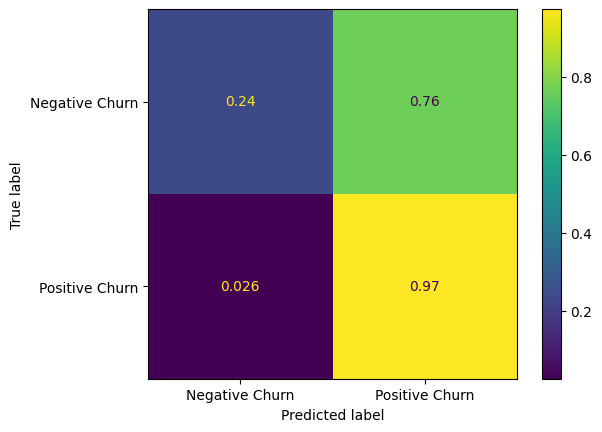

In [45]:
log_reg_pred = best_log_reg.predict(X_test_pca)

print(classification_report(y_pred=log_reg_pred, y_true=y_test))

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=best_log_reg,
                                      X=X_test_pca, y=y_test,
                                      normalize="true",
                                      display_labels=["Negative Churn",  "Positive Churn"])

### Random Forest (Comparison)

              precision    recall  f1-score   support

         0.0       0.98      0.06      0.11     33881
         1.0       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

[[ 1955 31926]
 [   40 30453]]


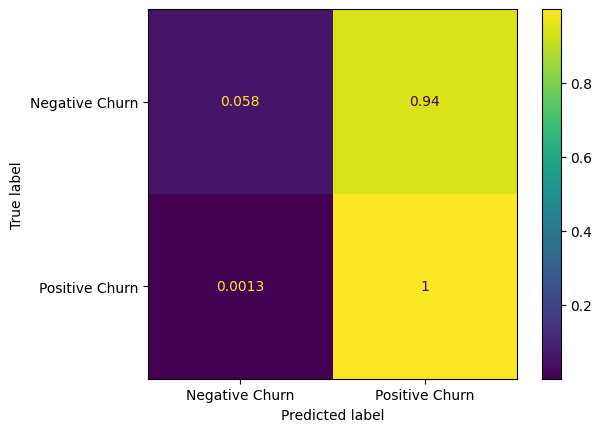

In [46]:
rf_pred = best_estimator_rf.predict(X_test_encoded)

print(classification_report(y_pred=rf_pred, y_true=y_test))

print(confusion_matrix(y_pred=rf_pred, y_true=y_test))

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=best_estimator_rf,
                                      X=X_test_encoded, y=y_test,
                                      normalize="true",
                                     display_labels=["Negative Churn",  "Positive Churn"])

### SVM

In [ ]:
svm_pred = svm.predict(X_test_pca)

print(classification_report(y_pred=svm_pred, y_true=y_test))

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=svm,
                                      X=X_test_pca, y=y_test,
                                      normalize="true",
                                      display_labels=["Negative Churn",  "Positive Churn"])

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_prob_pred = svm.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred)
roc_auc = roc_auc_score(y_test, y_prob_pred)

print("ROC AUC score: ", roc_auc)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
